# cleaning

## segmentation_test


In [ ]:
import jieba
sent = jieba.cut("暴徒到處犯法都沒事，香港不單單是逃犯天堂，簡直是犯罪天堂", cut_all=False)
words = [w for w in sent]
print("/".join(words))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built successfully.


暴徒/到/處/犯法/都/沒事/，/香港/不單/單是/逃犯/天堂/，/簡直/是/犯罪/天堂


In [ ]:
!pip install cantoseg
!pip install --upgrade pycantonese

Requirement already up-to-date: pycantonese in /usr/local/lib/python3.6/dist-packages (3.0.0)


In [ ]:
import pycantonese as pc
words = pc.segment("暴徒到處犯法都沒事，香港不單單是逃犯天堂，簡直是犯罪天堂")
print("/".join(words))

暴徒/到處/犯法/都/沒事/，/香港/不單/單/是/逃犯/天堂/，/簡直/是/犯罪/天堂


In [ ]:
import cantoseg
vocab = cantoseg.cut('暴徒到處犯法都沒事，香港不單單是逃犯天堂，簡直是犯罪天堂')
print("/".join(vocab))


暴徒/到處/犯法/都/沒事/，/香港/不單單是/逃犯/天堂/，/簡直/是/犯罪/天堂


In [ ]:
import cantoseg
import jieba
vocab = cantoseg.cut('暴徒到處犯法都沒事，香港不單單是逃犯天堂，簡直是犯罪天堂')
sent= jieba.cut("".join(vocab), cut_all=False)
words = [w for w in sent]

#print("/".join(words))
words

['暴徒',
 '到處',
 '犯法',
 '都',
 '沒事',
 '，',
 '香港',
 '不單單是',
 '逃犯',
 '天堂',
 '，',
 '簡直',
 '是',
 '犯罪',
 '天堂']

In [ ]:
import pycantonese as pc
stop_words = pc.stop_words()
stop_words
stopwdf = pd.DataFrame()
stopwdf['word'] = list(stop_words)
stopwdf.to_csv('/content/drive/MyDrive/DISSERTATION/stopword.csv', index = False)


## stopword & punct


In [ ]:
punt_str="! @ # $ % ^ & * ( ) - _ + = [ ] { } \ | ; : ' \" , . < > / ? ` ~ ！ @ # $ % ⋯ & （ ） - —— + = * 【 】 「 」 、 ｜ ： ； ， 。 ？ / ～ ·"
punct= punt_str.split()
punct

In [ ]:
stopwfile = open('/content/drive/MyDrive/DISSERTATION/stopword.csv', 'r').readlines()
stopwordlist = [word.strip() for word in stopwfile]
spaces = [' ', '\n']
stopwordlist += spaces
stopwordpunct = stopwordlist + punct
stopwordpunct

In [ ]:
#!pip install cantoseg
import cantoseg
import jieba
def clean(insent):
  vocab = cantoseg.cut(insent)
  sent= jieba.cut("".join(vocab), cut_all=False)
  words = [w for w in sent]
  cleaned_sent = []
  for word in words:
    if word not in stopwordpunct:
      cleaned_sent.append(word)
  return cleaned_sent

clean('等於俾美國遞解出境\n做特首做到咁羞家，真係香港人嘅恥辱')

['等於', '俾', '美國', '遞解', '出境', '做', '特首', '做到', '羞家', '香港人', '恥辱']

# baselines

In [ ]:
!pip install cantoseg
import cantoseg
import jieba
def segmenter(sentence):
  vocab = cantoseg.cut(sentence)
  sent= jieba.cut("".join(vocab), cut_all=False)
  words = [w for w in sent]
  return " ".join(words)

     |████████████████████████████████| 3.1MB 21.7MB/s 


In [ ]:
import cantoseg
import jieba

punt_str="! @ # $ % ^ & * ( ) - _ + = [ ] { } \ | ; : ' \" , . < > / ? ` ~ ！ @ # $ % ⋯ & （ ） - —— + = * 【 】 「 」 、 ｜ ： ； ， 。 ？ / ～ ·"
punct= punt_str.split()
stopwfile = open('/content/drive/MyDrive/DISSERTATION/stopword.csv', 'r').readlines()
stopwordlist = [word.strip() for word in stopwfile]
spaces = [' ', '\n']
stopwordlist += spaces
stopwordpunct = stopwordlist + punct

def clean(insent):
  vocab = cantoseg.cut(insent)
  sent= jieba.cut("".join(vocab), cut_all=False)
  words = [w for w in sent]
  cleaned_sent = []
  for word in words:
    if word not in stopwordpunct:
      cleaned_sent.append(word)
  return " ".join(cleaned_sent)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA - ALL.csv")
data = df.replace(["Discuss", "LIHKG"], [0, 1])
posts = data.Comment.tolist()
postSegs = [segmenter(post) for post in posts]
data['Segments'] = postSegs
noSPsegs = [clean(post) for post in posts]
data['NoStopPunct'] = noSPsegs
data.to_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA_seg.csv")
data

Comment  ...                                        NoStopPunct
0                           搵曬cctv 重整當日721 恐襲事件\n睇到我又喊多次  ...                      搵 曬 cctv 重整 當日 721 恐襲 事件 喊 多次
1                                   呢條片根本可以直接send 比班狗去拉人  ...                              條片 根本 直接 send 比班狗 拉 人
2                                            我個港豬老母睇得好入神  ...                                        我個 港豬 老母 入神
3                                                 可以搞播放會  ...                                               搞 播放
4      推\n光復香港，時代革命！\n想比更多人知道其實而家呢一刻基本上得番香港獨立呢條路，\n我知...  ...  推 光復 香港 時代 革命 比 更多 人 知道 其實 一刻 基本上 得番 香港 獨立 條路 ...
...                                                  ...  ...                                                ...
15672  諗法係幾好\n不過你搞清楚主動被動未?\n林病去買一些市面產品梗係無問題\n但要做一些需要查...  ...  諗法 幾好 搞清楚 主動 被動 林病 買 一些 市面 產品 問題 但 做 一些 需要 查 背...
15673  老美要打橫黎，乜野都可以係問题。\n所以我話「直接間接」，你個品牌賣左野畀林鄭，就算係零售商...  ...  老美 打橫 黎 乜野 問题 我話 直接 間接 品牌 賣 左野 畀 林 鄭 就算 零售商 賣 ...
15674                       等於俾美國遞解出境\n做特首做到咁羞家，真係香港人嘅恥辱  ...                    等於 俾 美國 遞解 出境 做 特首 做到 羞家 香港人 恥辱
15675                                          撕裂2.0的下場。  ...                                          撕裂 2.0 下場
15676                                         Support 林鄭  ...                                       S up port 林鄭

[15677 rows x 4 columns]

In [ ]:
X = data.NoStopPunct
y = data.Forum

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

#vectorizer = CountVectorizer(binary=True, analyzer='word', ngram_range = (1,1))
vectorizer = TfidfVectorizer(use_idf=True, analyzer='word', ngram_range = (1,1))
#vectorizer.fit(X).vocabulary_ #returns dict of {vocab:index}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

### Vectorize documents ###
#vectorizer = CountVectorizer(binary=True, analyzer='char', ngram_range = (3,3))
#vectorizer = TfidfVectorizer(use_idf=True, analyzer='char', ngram_range = (2,3))
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
y_train_v = np.array(y_train)
y_test_v = np.array(y_test)

# corpus


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DISSERTATION/DATA/TRAINING_DATA_seg.csv")
data

FileNotFoundError: ignored

In [ ]:
comments = data.Comment.tolist()
comment_lengths = []
for comment in comments:
  comment_lengths.append(len(comment))

avg_length = sum(comment_lengths)/len(comment_lengths)
print("Total no. of chars: ", sum(comment_lengths))
print("Avg char/comment: ", avg_length)

Total no. of chars:  439608
Avg char/comment:  28.041589589844996


In [ ]:
len(comments)

15677

In [ ]:
counter = 0
for comment in comments:
  if len(comment) <= 20:
    counter += 1

counter

9078

In [ ]:
from collections import Counter

def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

In [ ]:
text = data.Segments
counter = counter_word(text)
word_count = len(counter)

In [ ]:
freq_list_all = counter.most_common()

In [ ]:
len(freq_list_all)

In [ ]:
freq_all = pd.DataFrame(freq_list_all, columns=['Word', 'Freq'])
freq_all.to_csv('/content/drive/MyDrive/DISSERTATION/wordList_all.csv')

## bigram generator

In [ ]:
comments = data.Comment.tolist()
bigrams = []
for comment in comments:
  bigramList = [comment[i:i+2] for i in range(len(comment)-1)]
  bigrams.append(" ".join(bigramList))

data['Bigrams'] = bigrams
data.to_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA_seg_bi.csv", index = False)

In [ ]:
from collections import Counter

def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA_seg_bi.csv")
text = data.Bigrams
counter = counter_word(text)
word_count = len(counter)

In [ ]:
freq_list_all = counter.most_common()
sum = 0
for freq in freq_list_all:
  sum += freq[1]

sum

423607

In [ ]:
word_count

118500

In [ ]:
freq_all = pd.DataFrame(freq_list_all, columns=['Bigram', 'Freq'])
freq_all.to_csv('/content/drive/MyDrive/DISSERTATION/BigramList_all.csv', index = False)

## unigram


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DISSERTATION/DATA/TRAINING_DATA_seg_bi.csv")
comments = data.Comment.tolist()
unigrams = [' '.join(list(comment)) for comment in comments]

data['Unigrams'] = unigrams
data.to_csv("/content/drive/MyDrive/DISSERTATION/DATA/TRAINING_DATA_seg_uni_bi.csv", index = False)

In [ ]:
from collections import Counter

def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in i:
      count[word] += 1
  return count


text = data.Comment
counter = counter_word(text)
word_count = len(counter)

In [ ]:
word_count

4046

In [ ]:
freq_list_all = counter.most_common()
sum = 0
for freq in freq_list_all:
  sum += freq[1]

sum

439608

In [ ]:
freq_all = pd.DataFrame(freq_list_all, columns=['Unigram', 'Freq'])
freq_all.to_csv('/content/drive/MyDrive/DISSERTATION/UnigramList_all.csv', index = False)

In [ ]:
len(freq_list_all)

4046

# NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBayes = MultinomialNB()
NBayes.fit(X_train_v, y_train_v)
pred_NB = NBayes.predict(X_test_v)
#results = zip(X_test, pred_NB)

In [ ]:
results = zip(X_test, pred_NB)
results_output = list(results)
outdf = pd.DataFrame(results_output, columns=["SegmentedPosts", "PredClass"])
outdf['TrueClass'] = y_test.tolist()
outdf.to_csv('/content/drive/MyDrive/DISSERTATION/RESULTS/MNBresults_tfidf_cleanseg.csv', index = False)
outdf

SegmentedPosts  PredClass  TrueClass
0     診所 實在 做 非常 啱 病毒 武漢 黎 叫 武漢 肺炎 叫 身在 澳洲 中國 人 條氣 順...          0          0
1                              攞 英 藉 仔 女 接受 英國 教育 抵 晒 啦          1          1
2                 老美 站 香港 身後 … … 放毒 箭 還 記得 毒果 最初 第一個 廣告          0          0
3                                    做少 戲 認真 搞仲好 啦 吊 中共          1          1
4                                      老豆 老母 YouTu be 啦          1          1
...                                                 ...        ...        ...
3915                              垃圾桶 無蓋 亦都 無人 肯清 一 鑊 熟          1          1
3916                            英國 on 9 走路 返黎 理解 雖然 狗 左          1          1
3917  假藍絲 講半 講半 明顯 轉移視線 確診 哈薩克 機組 爆疫 禮頓 山 家庭 樣本 相同 禮...          1          0
3918                                     支持 移民 北京 做紅 天使          0          1
3919                                              武漢 獨立          1          1

[3920 rows x 3 columns]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("tfidf Vevtorizer; cleanseg")
print("Accrucary:", accuracy_score(y_test, pred_NB))
print("Precision:", precision_score(y_test, pred_NB))
print("Recall:", recall_score(y_test, pred_NB))
print("F1 score:", f1_score(y_test, pred_NB))
print("Confusion matrix:\n", confusion_matrix(y_test, pred_NB))


tfidf Vevtorizer; cleanseg
Accrucary: 0.773469387755102
Precision: 0.7533460803059273
Recall: 0.8901943063714415
F1 score: 0.8160729080364539
Confusion matrix:
 [[1062  645]
 [ 243 1970]]


In [ ]:
discuss_feats_sorted = NBayes.feature_log_prob_[0, :].argsort()
lihkg_feats_sorted = NBayes.feature_log_prob_[1, :].argsort()
DfeatList = np.take(vectorizer.get_feature_names(), discuss_feats_sorted[:1000]).tolist()
LfeatList = np.take(vectorizer.get_feature_names(), lihkg_feats_sorted[:1000]).tolist()
featDF = pd.DataFrame()
featDF['Discuss'] = DfeatList
featDF['LIHKG'] = LfeatList
featDF.to_csv('/content/drive/MyDrive/DISSERTATION/RESULTS/MNBresults_count_3_feats.csv', index = True)

NotFittedError: ignored

In [ ]:
lihkg_feats_sorted = NBayes.feature_log_prob_[1, :].argsort()
print(np.take(vectorizer.get_feature_names(), lihkg_feats_sorted[:1000]))

['就話中港係一國' '所以懷疑食野味' '所以懷疑食野味 依家追蹤到武漢比較先的病例' '所以我一直都撐警'
 '所以我一直都撐警 呢個政府好多野都撐唔落' '所以我唔明你講乜囉' '所以我唔明你講乜囉 香港政府主要收入係賣地同印花稅'
 '所以我會叫佢地做黑衣廢柴' '所以我覺得香港已響起喪鐘' '所以我講如果你係香港市民就會明白'
 '所以我講如果你係香港市民就會明白 更何況利得稅只佔香港政府稅收小部分' '所以才會胆心' '所以才用毒果這個' '所以撒回不對言論'
 '所以撒回不對言論 更道歉' '所以支持警察嚴正執法' '所以後來就出現三白眼柳進肛等人殺入元朗 最後'
 '所以支持警察嚴正執法 但如警察在履行職責時有違法仍須接受法庭審理' '所以後來就出現三白眼柳進肛等人殺入元朗' '所以形勢不樂觀'
 '所以奶野 唔知真定假' '所以好多人向呢方面查' '所以好多人向呢方面查 袁國勇出現啦' '所以好多人都反送中'
 '所以好多人都反送中 我聽到o晒嘴' '所以好多死喺屋企' '所以好難解決到' '所以好難解決到 一個咁弱勢的政府'
 '所以就出埋曬d低三下四手段去趕盡殺絕' '所以就打人' '所以就打人 我心諗' '所以就算係跪低' '所以就算係跪低 而個結果唔係佢預其的'
 '所以建制咪慢慢要退出立法會' '所以建制咪慢慢要退出立法會 由政府背景人仕取替做立法會議員' '所以形勢不樂觀 希望守護香港的正常市民'
 '所以奶野' '所以敵人嘅敵人就係朋友' '所以早幾日已有多方呼籲元朗人勿穿黑衣' '所以林鄭今次堅仆街 這不是應否再給予她機會問題'
 '所以毒果係唔啱我地呢啲良好市民睇' '所以毒果係唔啱我地呢啲良好市民睇 就算佢報嗰啲全部係事實又點' '所以比人話都係抵死' '所以無法煞停'
 '所以無須割席' '所以無須割蓆' '所以犯淫係會有得益' '所以犯淫係會有得益 唯一問題就剩下鬼打鬼' '所以現在證據基本可以推翻covid'
 '所以現在證據基本可以推翻covid 19是野味惹禍' '所以現階段唔到開戰' '所以現階段唔到開戰 佢都唔會捉外國人住'
 '所以甘落力出post' '所以甘落力出post 努力' '所以林鄭今次堅仆街' '所以敵人嘅敵人就係朋友 所以一定投建制'
 '所以未必發源中國 但至少武漢肺炎系武漢把它發揚光大' '所以

# DEEP LEARNING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ds = pd.read_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA - ALL.csv")
ds = ds.replace(["Discuss", "LIHKG"], [0, 1])
ds.head()

Comment  Forum
0                       搵曬cctv 重整當日721 恐襲事件\n睇到我又喊多次      1
1                               呢條片根本可以直接send 比班狗去拉人      1
2                                        我個港豬老母睇得好入神      1
3                                             可以搞播放會      1
4  推\n光復香港，時代革命！\n想比更多人知道其實而家呢一刻基本上得番香港獨立呢條路，\n我知...      1

In [ ]:
len(ds)

15677

In [ ]:
X = ds.Unigrams
X = [str(x) for x in X]
y = ds.Forum

In [ ]:
#no. of unique words (seg_uncleaned) = 30034
#no. of unique chars (unigram) = 4046
#no. of unique bigrams = 118500
word_count = 2000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2) # alt:test_size=0.3,

In [ ]:
type(X_train)

### test data

In [ ]:
import pandas as pd
ts = pd.read_csv("/content/drive/MyDrive/DISSERTATION/DATA/DATA_seg_uni_bi - TEST.csv")
ts.head()

Comment  ... Forum
0                                       搵個守銀行門口亞差扮大佬  ...     0
1                      黨年立23條，你班曱甴咪有係未有細節已反對，而家求仁得仁啦  ...     0
2                                           越黎越多貨賣，正  ...     1
3  OK 武漢肺炎 源自美國 無錯 武漢肺炎唔好再講 要講WHO的新名 大家忘記\n唔好講啦\n...  ...     0
4  以前係有市政局同區域市政局\n情況就同上面個巴打建議差唔多\n不過我個提議係想將市政局順便取...  ...     1

[5 rows x 6 columns]

## tokenizer

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=word_count)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
#train_sequences

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=15)
test_padded = pad_sequences(test_sequences, maxlen=15)
#train_padded

In [ ]:
print(X_train[0])
print(train_sequences[0])

其 實 最 重 要 要 講 到 立 完 姐 係 開 左 後 門 同 大 陸 接 軌
[95, 81, 115, 186, 19, 19, 42, 16, 128, 168, 551, 2, 143, 74, 87, 474, 39, 13, 225, 339]


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#reverse_word_index

In [ ]:
def decode(text):
  return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
decode(train_sequences[0])

'其 實 最 重 要 要 講 到 立 完 姐 係 開 左 後 門 同 大 陸 接'

In [ ]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (11757, 15)
Shape of test (3920, 15)


In [ ]:
decode(test_sequences[0])

'診 所 實 在 做 得 非 常 啱 ！ 病 毒 由 武 漢 黎 ， 唔 叫 武 漢 肺 炎 叫 乜 ？ 身 在 澳 洲 的 中 國 人 ， 條 氣 唔 順 咪 返 大 陸 囉 ！'

In [ ]:
print(X_test[0])
print(y_test[0])

診 所 實 在 做 得 非 常 啱 ！ 病 毒 由 武 漢 黎 ， 唔 叫 武 漢 肺 炎 叫 乜 ？   身 在 澳 洲 的 中 國 人 ， 條 氣 唔 順 咪 返 大 陸 囉 ！
1


## one-hot

In [ ]:
import keras
from keras.preprocessing.text import one_hot
vocab_size = 2000 #no of unique words

oh_X_train = [one_hot(d, vocab_size, split=' ') for d in X_train]
oh_X_test = [one_hot(d, vocab_size, split=' ') for d in X_test]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_length = 15
oh_X_train_pad = pad_sequences(oh_X_train, maxlen=max_length)
oh_X_test_pad = pad_sequences(oh_X_test, maxlen=max_length)

In [ ]:
print(X_train[1], len(X_train[1]))
print(oh_X_train_pad[1], len(oh_X_train_pad[1]))

冲 去 黃 瓜 竇 分 身 家 15
[   0    0    0    0    0    0    0  658  816  569  313 1426  490 1688
   55] 15


In [ ]:
print(f"Shape of train {oh_X_train_pad.shape}")
print(f"Shape of test {oh_X_test_pad.shape}")

Shape of train (11757, 15)
Shape of test (3920, 15)


In [ ]:
type(oh_X_train_pad)

numpy.ndarray

## pre-trained embedding

In [ ]:
import numpy as np
embeddings_index = {}
#f = open('/content/drive/MyDrive/DISSERTATION/toastynews.vec')
f = open('/content/drive/MyDrive/DISSERTATION/cc.zh.300.vec')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 2000000 word vectors.


In [ ]:
embeddings_index

{'2000000': array([-0.0428,  0.0275,  0.0748,  0.0321,  0.0261,  0.0476, -0.0445,
         0.0016, -0.0182, -0.0033, -0.0548,  0.0014,  0.0206,  0.0227,
         0.0278, -0.0161,  0.0115,  0.0082,  0.0495,  0.0006,  0.0295,
        -0.0005, -0.0304,  0.0155,  0.0107,  0.0086,  0.0146,  0.016 ,
         0.0092,  0.0307,  0.0005,  0.0604,  0.0197,  0.0358,  0.0681,
        -0.025 , -0.0305, -0.001 , -0.0025, -0.0184,  0.0487, -0.0177,
        -0.0231, -0.0215,  0.02  ,  0.0674, -0.0428,  0.0038, -0.0343,
         0.0148,  0.014 ,  0.0042, -0.0055, -0.1181, -0.0031, -0.0077,
         0.0903, -0.0189,  0.0052, -0.0185, -0.0348,  0.0929, -0.0052,
        -0.0111,  0.0633, -0.0511, -0.0081,  0.0255, -0.0378,  0.0161,
         0.0384,  0.0024,  0.0275,  0.0191,  0.0112,  0.028 ,  0.0386,
        -0.0307,  0.0148,  0.0225,  0.0172, -0.0166, -0.0003,  0.0533,
        -0.0227, -0.0103, -0.0435,  0.0132,  0.0202, -0.0142,  0.0441,
        -0.0122,  0.0021, -0.0322,  0.0175, -0.0533, -0.0241,  0.0

In [ ]:
embedding_matrix = np.zeros((word_count, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(word_count,
                            300,
                            weights=[embedding_matrix],
                            input_length=15,
                            trainable=False)

## Cross validation

https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/#creating-a-keras-model-with-k-fold-cross-validation

In [ ]:
# Merge inputs and targets
import numpy as np

inputs = np.concatenate((oh_X_train_pad, oh_X_test_pad), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Define the K-fold Cross Validator
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

acc_per_fold, loss_per_fold = [], []

for train, test in kfold.split(inputs, targets):

  model = Sequential()
  model.add(Embedding(2000, 32, input_length = 15))
  model.add(Dense(1, activation = 'relu', kernel_regularizer=regularizers.l2(0.1)))
  model.add(LSTM(16, dropout=0.5))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=10)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

   # Generate generalization metrics
  preds = model.predict_classes(inputs[test])
  print(f'Confusion Matrix for fold {fold_no}:')
  print(confusion_matrix(targets[test], preds))
  print(f'Classification Report for fold {fold_no}:')
  print(classification_report(targets[test], preds))

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
441/441 [==============================] - 4s 5ms/step - loss: 0.7762 - accuracy: 0.5640
Epoch 2/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6454 - accuracy: 0.6388
Epoch 3/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6354 - accuracy: 0.6430
Epoch 4/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6288 - accuracy: 0.6469
Epoch 5/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6195 - accuracy: 0.6593
Epoch 6/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6158 - accuracy: 0.6640
Epoch 7/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6252 - accuracy: 0.6454
Epoch 8/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6177 - accuracy: 0.6562
Epoch 9/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6197 - accuracy: 0.6557
Epo

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion Matrix for fold 1:
[[338 358]
 [124 748]]
Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.73      0.49      0.58       696
           1       0.68      0.86      0.76       872

    accuracy                           0.69      1568
   macro avg       0.70      0.67      0.67      1568
weighted avg       0.70      0.69      0.68      1568

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
441/441 [==============================] - 4s 5ms/step - loss: 0.8243 - accuracy: 0.5609
Epoch 2/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6526 - accuracy: 0.6382
Epoch 3/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6376 - accuracy: 0.6434
Epoch 4/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6258 - accuracy: 0.6548
Epoch 5/10
441/441 [==============================] - 2s 5ms/step - loss: 0.6222 - accurac

https://stackoverflow.com/questions/53531167/how-to-display-confusion-matrix-and-report-recall-precision-fmeasure-for-eac

https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report

## LSTM

In [ ]:
from keras.layers import LSTM, Dropout
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers

model = Sequential()
model.add(Embedding(word_count, 32, input_length = 15))
#model.add(embedding_layer) #pretrained
#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(LSTM(16, dropout=0.5, kernel_regularizer=regularizers.l2(0.1)))
#model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
#model.add(Dense(1, activation = 'tanh'))
#optimizer = Adam(learning_rate=3e-4)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#history = model.fit(train_padded, y_train, epochs=100, batch_size =10, validation_data=(test_padded, y_test))
history = model.fit(oh_X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(oh_X_test_pad, y_test))

Epoch 1/10
245/245 [==============================] - 11s 38ms/step - loss: 2.9905 - accuracy: 0.5498 - val_loss: 0.7818 - val_accuracy: 0.6460
Epoch 2/10
245/245 [==============================] - 9s 37ms/step - loss: 0.6334 - accuracy: 0.7560 - val_loss: 0.6101 - val_accuracy: 0.6977
Epoch 3/10
245/245 [==============================] - 9s 37ms/step - loss: 0.3094 - accuracy: 0.8868 - val_loss: 0.5983 - val_accuracy: 0.7188
Epoch 4/10
245/245 [==============================] - 9s 37ms/step - loss: 0.1642 - accuracy: 0.9483 - val_loss: 0.8958 - val_accuracy: 0.6616
Epoch 5/10
245/245 [==============================] - 9s 37ms/step - loss: 0.1119 - accuracy: 0.9658 - val_loss: 0.8518 - val_accuracy: 0.7153
Epoch 6/10
245/245 [==============================] - 9s 37ms/step - loss: 0.0894 - accuracy: 0.9743 - val_loss: 0.9132 - val_accuracy: 0.7014
Epoch 7/10
245/245 [==============================] - 9s 37ms/step - loss: 0.0779 - accuracy: 0.9815 - val_loss: 1.1668 - val_accuracy: 0.709

## CNN

In [ ]:
from keras.layers import Conv1D, MaxPool1D
from keras.layers import Dense, Embedding, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
#model.add(embedding_layer) #pretrained
model.add(Embedding(word_count, 30, input_length = 15))
model.add(Conv1D(128, 10, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(MaxPool1D())
model.add(Dense(32, activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_padded, y_train, epochs=20, batch_size =30, validation_data=(test_padded, y_test))
#history = model.fit(oh_X_train_pad, y_train, epochs=10, batch_size =32, validation_data=(oh_X_test_pad, y_test))

Epoch 1/10
368/368 [==============================] - 13s 34ms/step - loss: 9.6151 - accuracy: 0.5529 - val_loss: 6.6415 - val_accuracy: 0.5645
Epoch 2/10
368/368 [==============================] - 12s 34ms/step - loss: 6.8082 - accuracy: 0.5536 - val_loss: 6.6404 - val_accuracy: 0.5645
Epoch 3/10
368/368 [==============================] - 12s 34ms/step - loss: 6.6824 - accuracy: 0.5618 - val_loss: 6.6404 - val_accuracy: 0.5645
Epoch 4/10
368/368 [==============================] - 12s 34ms/step - loss: 6.8010 - accuracy: 0.5540 - val_loss: 6.6404 - val_accuracy: 0.5645
Epoch 5/10
115/368 [========>.....................] - ETA: 8s - loss: 6.7597 - accuracy: 0.5567

KeyboardInterrupt: ignored

## Transformer

In [ ]:
!git clone https://huggingface.co/toastynews/xlnet-hongkongese-base

fatal: destination path 'xlnet-hongkongese-base' already exists and is not an empty directory.


In [ ]:
!pip install transformers
!pip install transformers[sentencepiece]

     |████████████████████████████████| 1.8MB 6.1MB/s 
     |████████████████████████████████| 890kB 17.9MB/s 
     |████████████████████████████████| 2.9MB 25.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=8de152c8d79c225f3164a7f2001b87a3c18df7937a862a05894c476b31d2da30
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 1.1MB 4.6MB/s 
     |████████████████████████████████| 25.3MB 170kB/s 
     |████████████████████████████████| 6.8MB 18.9MB/s 
     |████████████████████████████████| 983kB 74.7MB/s 
     |████████████████████████████████| 266kB 21.5MB/s 
     |████████████████████████████████| 1.3MB 25.0MB/s 
     |████████████████████████████████| 471kB 48.9MB/s 
     |████████████████████████████████| 2.9MB 54.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha25

In [ ]:
from transformers import AutoTokenizer, TFAutoModelWithLMHead, TFXLNetForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("toastynews/xlnet-hongkongese-base")
#model = TFAutoModelWithLMHead.from_pretrained("toastynews/xlnet-hongkongese-base")
#model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')
model = TFXLNetForSequenceClassification.from_pretrained('toastynews/xlnet-hongkongese-base')

Some layers from the model checkpoint at toastynews/xlnet-hongkongese-base were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFXLNetForSequenceClassification were not initialized from the model checkpoint at toastynews/xlnet-hongkongese-base and are newly initialized: ['logits_proj', 'sequence_summary']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
comments = ds.Comment.tolist()
forum = ds.Forum.tolist()
#comments

In [ ]:
comments

In [ ]:
forum[5000]

In [ ]:
import tensorflow as tf
inputs = [tokenizer.encode_plus(c, max_length = 20,
                                truncation = True, padding="max_length",
                                add_special_tokens=True, return_token_type_ids=False,
                                return_attention_mask=True, return_tensors="tf")
            for c in comments]

In [ ]:
import numpy as np
Xids = np.zeros((len(comments), 20))
Xmask = np.zeros((len(comments), 20))
#Xids.shape ==> (15677, 20)

In [ ]:
for (i, comment) in enumerate(comments):
  tokens = tokenizer.encode_plus(comment, max_length = 20,
                                truncation = True, padding="max_length",
                                add_special_tokens=True, return_token_type_ids=False,
                                return_attention_mask=True, return_tensors="tf")
  Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [ ]:
labels = ds['Forum'].to_numpy(np.int32)
#labels

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
def map_func(input_ids, masks, labels):
  return {'input_ids': tf.dtypes.cast(input_ids, tf.int32) , 'attention_mask': tf.dtypes.cast(masks, tf.int32)}, labels

In [ ]:
dataset = dataset.map(map_func)

In [ ]:
dataset = dataset.shuffle(100000).batch(32)

In [ ]:
DS_LEN = len(list(dataset))
DS_LEN

490

In [ ]:
SPLIT = .75

train = dataset.take(round(DS_LEN*SPLIT))
test = dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
train

<TakeDataset shapes: ({input_ids: (None, 20), attention_mask: (None, 20)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

In [ ]:
import tensorflow as tf


# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch for illustration, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 10

# optimizer Adam recommended
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [ ]:
import keras
input_ids = tf.keras.layers.Input(shape=(20,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(20,), name='attention_mask')

embeddings = model(input_ids, attention_mask = mask)[0]
X=tf.keras.layers.GlobalMaxPool1D()(embeddings)
X=tf.keras.layers.BatchNormalization()(X)
X=tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.1))(X)
X=tf.keras.layers.Dropout(0.5)(X)
y=tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputs')(X)

kmodel = tf.keras.Model(inputs=[input_ids, mask], outputs=y)


In [ ]:
model.summary()

Model: "tfxl_net_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transformer (TFXLNetMainLaye multiple                  116718336 
_________________________________________________________________
sequence_summary (TFSequence multiple                  590592    
_________________________________________________________________
logits_proj (Dense)          multiple                  1538      
Total params: 117,310,466
Trainable params: 117,310,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train, validation_data = test, epochs=15)

Epoch 1/15
368/368 [==============================] - 3497s 9s/step - loss: 6.6999 - accuracy: 0.5275 - val_loss: 6.7509 - val_accuracy: 0.5573
Epoch 2/15
368/368 [==============================] - 3485s 9s/step - loss: 6.8704 - accuracy: 0.5137 - val_loss: 6.6219 - val_accuracy: 0.5658
Epoch 3/15
368/368 [==============================] - 3349s 9s/step - loss: 6.7967 - accuracy: 0.5194 - val_loss: 6.7900 - val_accuracy: 0.5547
Epoch 4/15
368/368 [==============================] - 3477s 9s/step - loss: 6.7567 - accuracy: 0.5258 - val_loss: 6.8760 - val_accuracy: 0.5491
Epoch 5/15
368/368 [==============================] - 3369s 9s/step - loss: 6.8734 - accuracy: 0.5143 - val_loss: 6.7900 - val_accuracy: 0.5547
Epoch 6/15
368/368 [==============================] - 3569s 10s/step - loss: 6.6383 - accuracy: 0.5197 - val_loss: 6.6649 - val_accuracy: 0.5629
Epoch 7/15
368/368 [==============================] - 3448s 9s/step - loss: 6.8655 - accuracy: 0.5024 - val_loss: 6.6610 - val_accuracy


https://arxiv.org/pdf/1906.08237.pdf

#### roberta

In [ ]:
from transformers import TFXLMRobertaModel, XLMRobertaTokenizer, TFRobertaForSequenceClassification
tokenizer = XLMRobertaTokenizer.from_pretrained('jplu/tf-xlm-roberta-base')
model = TFRobertaForSequenceClassification.from_pretrained('jplu/tf-xlm-roberta-base')

Some layers from the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFRobertaForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at jplu/tf-xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def make_model(embed_model):


    input_ids = tf.keras.layers.Input(shape=(20,), name='input_token', dtype='int32')

    embed_layer = embed_model([input_ids])[0]
    avg_pool = tf.reduce_mean(embed_layer, axis=1)
    max_pool = tf.reduce_max(embed_layer, axis=1)
    X = tf.concat([avg_pool, max_pool], axis=1)
    X = tf.keras.layers.Dropout(0.3)(X)
    X = tf.keras.layers.Dense(1, activation="sigmoid")(X)
    model = tf.keras.Model(inputs=input_ids, outputs = X)
    return model



xr_model = make_model(model)

In [ ]:
xr_model = make_model(xlm_roberta)
xr_model.summary()
xr_model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-5), loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1), metrics=[tf.keras.metrics.AUC()])

## EVAL

In [ ]:
#prediction = model.predict_classes(oh_X_test_pad)
prediction = model.predict_classes(test_padded)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions = [int(str(p[0])[1]) for p in prediction.tolist()]
#predictions

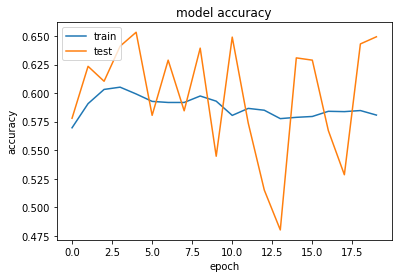

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


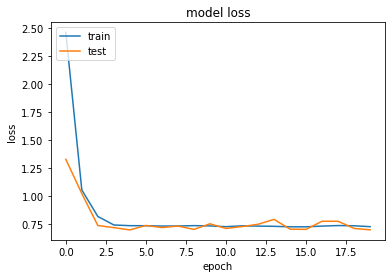

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("CNN; seg_clean, ftzh, 20 epochs")
print("Accrucary:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))
print("Confusion matrix:\n", confusion_matrix(y_test, prediction))

CNN; seg_clean, ftzh, 20 epochs
Accrucary: 0.5373134328358209
Precision: 0.5799793601651186
Recall: 0.6383462062698774
F1 score: 0.6077646804368986
Confusion matrix:
 [[1402 2035]
 [1592 2810]]


In [ ]:
predictions = [str(p) for p in prediction]
results = zip(X_test, y_test, predictions)
resultdf = pd.DataFrame(results, columns =['Post', 'Forum', 'Prediction'])
resultdf

## RoBERTa

In [ ]:
!pip install transformers
!pip install transformers[sentencepiece]

# try

In [ ]:
import pandas as pd
#df = pd.read_csv("/content/drive/MyDrive/DISSERTATION/TRAINING_DATA - ALL.csv")
df = pd.read_csv('/content/drive/MyDrive/DISSERTATION/cleaned_data_all.csv')
data_topic = df.replace(["721", "election", "elab", "covid", "carrie"], [1,2,3,4,5])
data = data_topic.replace(["discuss", "lihkg"], [0, 1])
X_topic = data.topic
X_text = data.comment
y = data.forum

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
vectorizer = CountVectorizer(binary=True, analyzer='char', ngram_range = (1,1), max_features=1000)
countVecs = vectorizer.fit_transform(X)
testdf = pd.DataFrame(countVecs[0].T.todense(), index=vectorizer.get_feature_names(), columns=["countV"])
testdf.sort_values(by=["countV"],ascending=False)

TypeError: ignored

In [ ]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, analyzer='char', ngram_range=(1,1))
tfidf_vectors=tfidf_vectorizer.fit_transform(X)
tfidf_vectors[0]
testdf = pd.DataFrame(tfidf_vectors[0].T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
testdf.sort_values(by=["tfidf"],ascending=False)


tfidf
c   0.349122
喊   0.288374
襲   0.261974
整   0.244526
曬   0.236890
..       ...
愎   0.000000
意   0.000000
愚   0.000000
愛   0.000000
𩣑   0.000000

[4017 rows x 1 columns]

In [ ]:
from sklearn.metrics import average_precision_score as APS
print('Naive Bayes:', APS(y_test, pred_NB))

## sklearn regressions

In [ ]:
### Training 3 models using 3 algorithms ###
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit models
linReg = LinearRegression()
rfReg = RandomForestRegressor(n_jobs = -1, n_estimators=100)
gbReg = GradientBoostingRegressor(n_estimators=20)

linReg.fit(X_train, y_train)
rfReg.fit(X_train, y_train)
gbReg.fit(X_train, y_train)

# Make predictions and evaluate performance
from sklearn.metrics import average_precision_score as APS
pred_lin = linReg.predict(X_test)
pred_rf = rfReg.predict(X_test)
pred_gb = gbReg.predict(X_test)

print('Linear Regression:', APS(y_test, pred_lin))
print('Random Forest Regression:',APS(y_test, pred_rf))
print('Gradient Boosting Regression:',APS(y_test, pred_gb))

Linear Regression: 0.8313088682442941
Random Forest Regression: 0.843655813356371
Gradient Boosting Regression: 0.7999341932317655


In [ ]:
Average Precision Score:
"""ngram(1,1)"""
Linear Regression: 0.8343524012721846
Random Forest Regression: 0.8421397676143799
Gradient Boosting Regression: 0.7970121589593632
"""ngram(2,2)"""
Linear Regression: 0.8013275398988257
Random Forest Regression: 0.8451875849122149
Gradient Boosting Regression: 0.6724974716067341
"""ngram(3,3)"""
Linear Regression: 0.8083514651231141
Random Forest Regression: 0.7853942072206077
Gradient Boosting Regression: 0.6089568778089032
"""ngram(1,2)"""
Linear Regression: 0.8043785855902833
Random Forest Regression: 0.8455770756167762
Gradient Boosting Regression: 0.7999966673404254
"""ngrams(2,3)"""
Linear Regression: 0.829750674386258
Random Forest Regression: 0.8449753210591014
Gradient Boosting Regression: 0.6727095349548075
"""ngrams(1,3)"""
Linear Regression: 0.8313088682442941
Random Forest Regression: 0.843655813356371
Gradient Boosting Regression: 0.7999341932317655

In [ ]:
### Feature Importances for Different Models ###
feature_names = vectorizer.get_feature_names()
LRimportances = linReg.coef_
RFimportances = rfReg.feature_importances_
GBimportances = gbReg.feature_importances_

ALLimportances = [LRimportances, RFimportances, GBimportances]
for importance in ALLimportances:
  zipped = zip(importance, feature_names)
  z = list(zipped)
  z.sort(reverse=True)
  # Getting the top 10 important features
  print("Top 100 important text features:")
  for x, y in z[:100]:
      print(x, y)

Top 100 important text features:
0.8758464142282931 叻仔
0.7596329031273277 好波
0.5640463654050253 熱狗
0.5622652926224344 好爽
0.50934754325406 抵啦
0.48925857367029996 洗！
0.4689627338498453 係囉
0.454754601611791 左膠
0.4502817755773633 笑左
0.4495887762744857 正呀
0.4494611999847299 求投
0.4420898065780827 哇
0.44208962506399246 真
0.442089374286109 完
0.44208606815295964 屌
0.43773473092734005 爽
0.43595328410358813 熱
0.4350691154212772 要人
0.4340889584884463 死圖
0.4331195256627266 好好同
0.4331195256627266 好同意
0.41669654157129027 信報
0.3992810995076577 即去
0.3896078171308806 快點
0.37798305281001554 又贏
0.37782869305319683 多謝
0.36437638464662275 唔好
0.3594416611999604 咪係
0.358338262369067 好同
0.35511819785968957 好叻
0.3494302540125793 算啦
0.3472703963036898 老同
0.33537095072009676 好樣衰
0.33537095072009676 好樣
0.33507741653241746 留名
0.3300051172439218 班狗
0.32986942640578903 會記得
0.32664930057072245 老鬼
0.326491279867476 手足
0.3263684614141404 係非法
0.3201926718996208 最好
0.3177707388695896 錯。。
0.3177707388695896 無錯。
0.317299736

##KNN

In [ ]:
### KNN
# Importing and fitting KNN classifier for k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Predicting results using Test data set
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("knn:", accuracy_score(pred,y_test))

knn: 0.5977040816326531


# try KERAS


In [ ]:
data

In [ ]:
X = data.NoStopPunct
y = data.Forum

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, epochs=1000)

### Make predictions
prediction = model.predict(X_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("tfidf Vevtorizer; cleanseg")
print("Accrucary:", accuracy_score(y_test, prediction))
print("Precision:", precision_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))
print("Confusion matrix:\n", confusion_matrix(y_test, prediction))

In [ ]:
pip install Keras-TextClassification

     |████████████████████████████████| 235kB 8.4MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 17.3MB 212kB/s 
     |████████████████████████████████| 317kB 56.5MB/s 
     |████████████████████████████████| 12.4MB 149kB/s 
     |████████████████████████████████| 501kB 55.2MB/s 
     |████████████████████████████████| 24.2MB 138kB/s 
     |████████████████████████████████| 8.9MB 171kB/s 
     |████████████████████████████████| 7.3MB 56.6MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 1.2MB 48.4MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=a1b484245af2b366f5b288b53778ff33993fdf9f1a525b27fb215192c7dd9204
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.

In [ ]:
from keras_textclassification import train
train(graph='TextCNN', # 必填, 算法名, 可选"ALBERT","BERT","XLNET","FASTTEXT","TEXTCNN","CHARCNN",
                       # "TEXTRNN","RCNN","DCNN","DPCNN","VDCNN","CRNN","DEEPMOJI",
                       # "SELFATTENTION", "HAN","CAPSULE","TRANSFORMER"
     label=17,         # 必填, 类别数, 训练集和测试集合必须一样
     path_train_data=None, # 必填, 训练数据文件, csv格式, 必须含'label,ques'头文件, 详见keras_textclassification/data
     path_dev_data=None, # 必填, 测试数据文件, csv格式, 必须含'label,ques'头文件, 详见keras_textclassification/data
     rate=1,             # 可填, 训练数据选取比例
     hyper_parameters=None)

# try BERT

In [ ]:
!pip install --upgrade tensorflow
!pip install transformers

     |████████████████████████████████| 394.3MB 43kB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


     |████████████████████████████████| 1.8MB 16.5MB/s 
     |████████████████████████████████| 890kB 43.7MB/s 
     |████████████████████████████████| 2.9MB 56.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=d6575b51b1ecf22e9a9a5a84b174664a116d41229c4e3e03c4d56eedb5741302
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-chinese',num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# try RoBERTa

In [ ]:
## Torch Modules
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
!pip install pytorch-transformers

In [ ]:
## PyTorch Transformer
from pytorch_transformers import RobertaModel, RobertaTokenizer
from pytorch_transformers import RobertaForSequenceClassification, RobertaConfig

In [ ]:
## Check if Cuda is Available
print(torch.cuda.is_available())